## Imports

In [1]:
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time


from numpy import genfromtxt
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from mpl_toolkits.mplot3d import Axes3D


from sklearn.linear_model import LogisticRegression
#----------------------------------------------Neural Net Imports
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical

# Linear stack of NN layers
from keras.models import Sequential

# Ensure Fully connected layer 
from keras.layers import Dense
#----------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



num_pixels = 28
%matplotlib inline

Using TensorFlow backend.


In [2]:
# Importing training  data from CSV files
x_train = genfromtxt('Data/Training/x_train_gr_smpl.csv', delimiter=',', skip_header =1)
y_train = genfromtxt('Data/Training/y_train_smpl.csv', delimiter=',', skip_header =1 )

In [3]:
# Importing testing data from CSV files
x_test = genfromtxt('Data/Testing/x_test_gr_smpl.csv', delimiter=',', skip_header =1)
y_test = genfromtxt('Data/Testing/y_test_smpl.csv', delimiter=',', skip_header =1 )

In [4]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 2304)
(12660,)
(4170, 2304)
(4170,)


## Preprocessing

In [5]:
# Combinging data with labels

y_train = y_train.reshape(12660,1)
train_data_combined = np.append(x_train, y_train, axis=1)

y_test = y_test.reshape(4170,1)
test_data_combined = np.append(x_test, y_test, axis=1)


In [6]:
# Randomises row order in a reproducable way 
np.random.seed(0)
np.random.shuffle(train_data_combined)
np.random.shuffle(test_data_combined)plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])

In [7]:
# Split data and lables that have undergone the same randomization process
x_train = train_data_combined[:,:-1]
y_train = train_data_combined[:, [-1]].reshape(12660,)

x_test = test_data_combined[:,:-1]
y_test = test_data_combined[:, [-1]].reshape(4170,)

In [8]:
# Normalisation of pixels
x_train = x_train.astype('float')/255
x_test  = x_test.astype('float')/255

In [9]:
#  Reducing the number of attributes using opencv's reduce functionality as shown in the second python Lecture
#  As seen in python lectures: https://vision.hw.ac.uk/webapps/blackboard/content/listContent.jsp?course_id=_94419_1&content_id=_3391865_1

x_train = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_train).reshape((-1,num_pixels*num_pixels))

x_test  = np.apply_along_axis(
        func1d=lambda img: cv2.resize(img.reshape((48,48)), (num_pixels,num_pixels)),
        axis =1, arr = x_test).reshape((-1,num_pixels*num_pixels))

In [10]:
x_train.shape

(12660, 784)

In [11]:
# Creating 10 bins for output
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

print(y_train.shape) 
print(y_test.shape)

(12660, 10)
(4170, 10)


## Linear Classifier - Logistic Regression

In [12]:
#lr = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial').fit(x_train, y_train)

In [13]:
#lr.predict(x_test)

## Buiding MLP Architecture

In [14]:
# Specifying Sequential Model
model = Sequential()

In [15]:
# Dense Adds fully connected nodes in each layer 

# Input layer is the number of pixels & their values 

# Layer 1
model.add(Dense(512, activation = 'relu',input_shape=(784,)))

# Layer 2
model.add(Dense(512, activation = 'relu'))

#Output Layer
model.add(Dense(10, activation = 'softmax'))


## Compiling the model

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [18]:
trained_network_output = model.fit(x_train,y_train, epochs = 20, validation_data = (x_test, y_test))

Train on 12660 samples, validate on 4170 samples
Epoch 1/20
12660/12660 [==============================] - 4s 278us/step - loss: 0.8521 - accuracy: 0.7288 - val_loss: 0.6789 - val_accuracy: 0.7763
Epoch 2/20
12660/12660 [==============================] - 3s 271us/step - loss: 0.3809 - accuracy: 0.8731 - val_loss: 0.4240 - val_accuracy: 0.8753
Epoch 3/20
12660/12660 [==============================] - 3s 270us/step - loss: 0.2760 - accuracy: 0.9067 - val_loss: 0.4905 - val_accuracy: 0.8626
Epoch 4/20
12660/12660 [==============================] - 3s 267us/step - loss: 0.2160 - accuracy: 0.9295 - val_loss: 0.5105 - val_accuracy: 0.8727
Epoch 5/20
12660/12660 [==============================] - 3s 271us/step - loss: 0.2145 - accuracy: 0.9321 - val_loss: 0.4167 - val_accuracy: 0.8933
Epoch 6/20
12660/12660 [==============================] - 3s 268us/step - loss: 0.1665 - accuracy: 0.9461 - val_loss: 0.4508 - val_accuracy: 0.8647
Epoch 7/20
12660/12660 [==============================] - 3s 26

# Evaluation

### Accuracy of training model

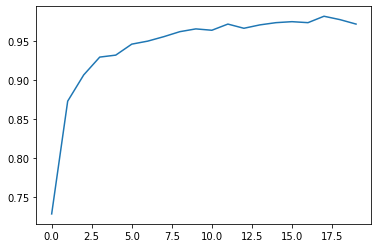

In [19]:
plt.plot(trained_network_output.history['accuracy'])

### Accuracy of training and validation set

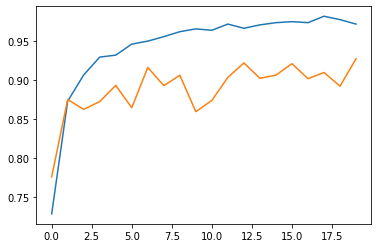

In [20]:
plt.plot(trained_network_output.history['accuracy'])
plt.plot(trained_network_output.history['val_accuracy'])

In [21]:
# Evalutation the model
score = model.evaluate(x_test, y_test)

4170/4170 [==============================] - 0s 73us/step


In [22]:
score
# 90% accuaracy!!!

[0.3935908693134309, 0.9273381233215332]

## 10-fold cross valiadation

In [23]:
def construct_new_model():
    model = Sequential()
    # Dense Adds fully connected nodes in each layer 

    # Input layer is the number of pixels & their values 

    # Layer 1
    model.add(Dense(512, activation = 'relu',input_shape=(784,)))

    # Layer 2
    model.add(Dense(512, activation = 'relu'))
    
    #Output Layer
    model.add(Dense(10, activation = 'softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])
    
    return model

    

In [24]:
# Uniformly separates classes in folds: See video @12:00 https://www.youtube.com/watch?v=gJo0uNL-5Qw
# Proportion of classes is same accross all folds
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [25]:
# https://www.youtube.com/watch?v=gJo0uNL-5Qw - Used to make code more concise 
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))
    return model.evaluate(x_test, y_test)

In [26]:
def get_network_output(model, x_train, x_test, y_train, y_test):
    x = model.fit(x_train, y_train, epochs = 20, validation_data = (x_test, y_test))
    return x

In [27]:
ScoreArray = []

In [28]:
#https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul
for i, (train_index, test_index) in enumerate(skf.split(x_train, y_train.argmax(1))):
    x_train_kf, x_test_kf = x_train[train_index], x_train[test_index]
    y_train_kf, y_test_kf = y_train[train_index], y_train[test_index]
    ScoreArray.append(get_score(construct_new_model(), x_train_kf, x_test_kf, y_train_kf, y_test_kf))
    #ScoreArray.append(get_score(model, x_train_kf, x_test_kf, y_train_kf, y_test_kf))


Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 4s 326us/step - loss: 0.8539 - accuracy: 0.7285 - val_loss: 0.6063 - val_accuracy: 0.7867
Epoch 2/5
11394/11394 [==============================] - 4s 315us/step - loss: 0.4018 - accuracy: 0.8669 - val_loss: 0.2908 - val_accuracy: 0.9155
Epoch 3/5
11394/11394 [==============================] - 4s 313us/step - loss: 0.2936 - accuracy: 0.9052 - val_loss: 0.6941 - val_accuracy: 0.7978
Epoch 4/5
11394/11394 [==============================] - 4s 312us/step - loss: 0.2614 - accuracy: 0.9167 - val_loss: 0.2286 - val_accuracy: 0.9344
Epoch 5/5
1266/1266 [==============================] - 0s 74us/step
Train on 11394 samples, validate on 1266 samples
Epoch 1/5
11394/11394 [==============================] - 4s 335us/step - loss: 0.8741 - accuracy: 0.7263 - val_loss: 0.5149 - val_accuracy: 0.8152
Epoch 2/5
11394/11394 [==============================] - 4s 319us/step - loss: 0.3916 - accuracy: 0

Epoch 5/5
1266/1266 [==============================] - 0s 66us/step


In [29]:
ScoreArray = np.array(ScoreArray)
ScoreArray[:,1:2]

array([[0.9052133 ],
       [0.93443918],
       [0.91548181],
       [0.91232228],
       [0.91864139],
       [0.95655608],
       [0.9273302 ],
       [0.91864139],
       [0.9115324 ],
       [0.94391787]])

In [30]:
# Average accuracy across the 10 folds
print(np.mean(ScoreArray[:,1:2]))

0.9244075894355774


# Moving 4000 images from training to test set

In [31]:
# Check data has been imported correctly 
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(12660, 784)
(12660, 10)
(4170, 784)
(4170, 10)


In [32]:
x_train_new = x_train[0:8660,:]
y_train_new = y_train[0:8660,:]

x_temp = x_train[8660:12660,:]
y_temp = y_train[8660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))





In [33]:
test = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

Train on 8660 samples, validate on 8170 samples
Epoch 1/20
8660/8660 [==============================] - 3s 352us/step - loss: 1.0052 - accuracy: 0.6836 - val_loss: 0.5124 - val_accuracy: 0.8230
Epoch 2/20
8660/8660 [==============================] - 3s 334us/step - loss: 0.4376 - accuracy: 0.8592 - val_loss: 0.4513 - val_accuracy: 0.8594
Epoch 3/20
8660/8660 [==============================] - 3s 337us/step - loss: 0.3409 - accuracy: 0.8829 - val_loss: 0.4311 - val_accuracy: 0.8422
Epoch 4/20
8660/8660 [==============================] - 3s 327us/step - loss: 0.2487 - accuracy: 0.9147 - val_loss: 0.4195 - val_accuracy: 0.8677
Epoch 5/20
8660/8660 [==============================] - 3s 323us/step - loss: 0.2644 - accuracy: 0.9145 - val_loss: 0.2741 - val_accuracy: 0.9304
Epoch 6/20
8660/8660 [==============================] - 3s 333us/step - loss: 0.2059 - accuracy: 0.9328 - val_loss: 0.2987 - val_accuracy: 0.9202
Epoch 7/20
8660/8660 [==============================] - 3s 328us/step - loss

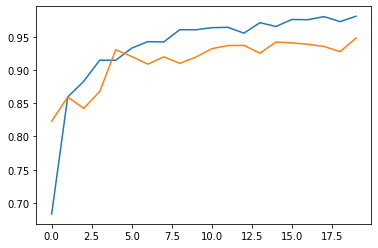

In [34]:
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])

# Moving 9000 images from training to test set


In [35]:
x_train_new = x_train[0:6660,:]
y_train_new = y_train[0:6660,:]

x_temp = x_train[6660:12660,:]
y_temp = y_train[6660:12660,:]

x_test_new = np.concatenate((x_test, x_temp))
y_test_new = np.concatenate((y_test, y_temp))

In [36]:
test2 = get_network_output(construct_new_model(), x_train_new, x_test_new, y_train_new, y_test_new)

Train on 6660 samples, validate on 10170 samples
Epoch 1/20
6660/6660 [==============================] - 3s 402us/step - loss: 1.1553 - accuracy: 0.6341 - val_loss: 0.9080 - val_accuracy: 0.7063
Epoch 2/20
6660/6660 [==============================] - 2s 343us/step - loss: 0.5002 - accuracy: 0.8356 - val_loss: 0.4427 - val_accuracy: 0.8538
Epoch 3/20
6660/6660 [==============================] - 3s 427us/step - loss: 0.3757 - accuracy: 0.8749 - val_loss: 0.4075 - val_accuracy: 0.8803
Epoch 4/20
6660/6660 [==============================] - 2s 359us/step - loss: 0.3271 - accuracy: 0.8907 - val_loss: 0.4054 - val_accuracy: 0.8834
Epoch 5/20
6660/6660 [==============================] - 3s 380us/step - loss: 0.2614 - accuracy: 0.9174 - val_loss: 0.3241 - val_accuracy: 0.8989
Epoch 6/20
6660/6660 [==============================] - 3s 381us/step - loss: 0.2179 - accuracy: 0.9287 - val_loss: 0.3309 - val_accuracy: 0.9137
Epoch 7/20
6660/6660 [==============================] - 2s 363us/step - los

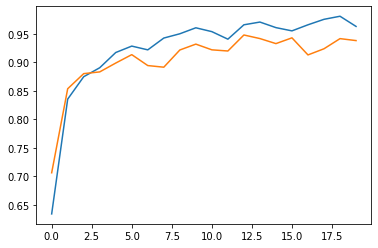

In [37]:
plt.plot(test2.history['accuracy'])
plt.plot(test2.history['val_accuracy'])